In [242]:
# Standard Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For Data Clensing
import re
import string
import nltk

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Labeling * Modelling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from scipy.sparse import hstack, csr_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


In [243]:
# Load the dataset (ensure 'train.csv' is in your working directory)
data = pd.read_csv('train.csv')

In [244]:
# Display the first few rows to inspect the data structure
data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [245]:
# Check the dataset's structure
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB
None


In [246]:
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
              count  hate_speech_count  offensive_language_count  \
count  24783.000000       24783.000000              24783.000000   
mean       3.243473           0.280515                  2.413711   
std        0.883060           0.631851                  1.399459   
min        3.000000           0.000000                  0.000000   
25%        3.000000           0.000000                  2.000000   
50%        3.000000           0.000000                  3.000000   
75%        3.000000           0.000000                  3.000000   
max        9.000000           7.000000                  9.000000   

       neither_count         class  
count   24783.000000  24783.000000  
mean        0.549247      1.110277  
std         1.113299      0.462089  
min         0.000000      0.000000  
25%         0.000000      1.000000  
50%         0.000000      1.000000  
75%         0.000000      1.000000  
max         9.000000      2.000000  


In [247]:
# Check for missing values in each column
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64


In [248]:
data.shape

(24783, 6)

In [249]:
data.columns

Index(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'class', 'tweet'],
      dtype='object')

In [250]:
data['class'].unique()

array([2, 1, 0])

In [251]:
data['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [252]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64


In [253]:
# Create binary target:
# We assume: class==2 -> safe; class==0 or 1 -> unsafe.
data['binary_class'] = data['class'].apply(lambda x: 'safe' if x == 2 else 'unsafe')

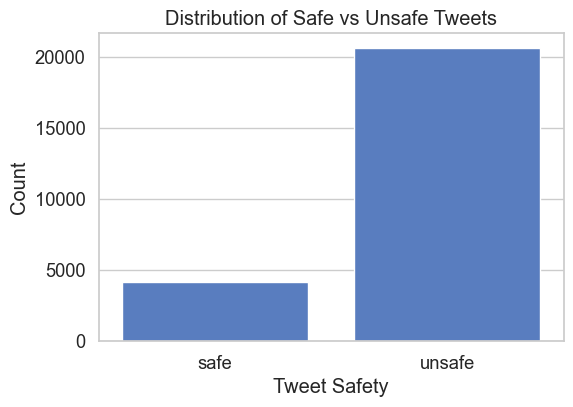

In [254]:
# Visualize the distribution of the binary target
plt.figure(figsize=(6,4))
sns.countplot(x='binary_class', data=data)
plt.title("Distribution of Safe vs Unsafe Tweets")
plt.xlabel("Tweet Safety")
plt.ylabel("Count")
plt.show()

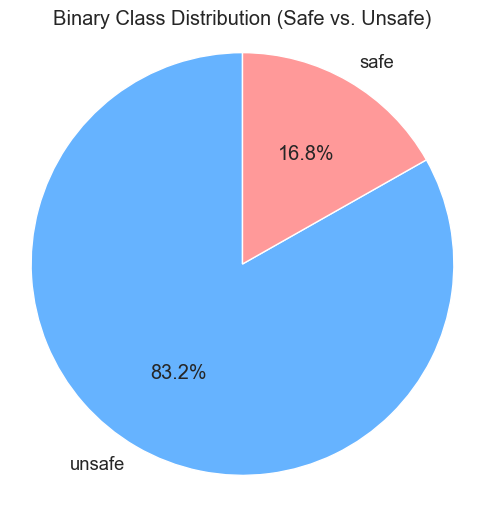

In [255]:
# Calculate the distribution of binary classes
binary_counts = data['binary_class'].value_counts()

# Create a pie chart with percentage labels
plt.figure(figsize=(6,6))
plt.pie(binary_counts, labels=binary_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Binary Class Distribution (Safe vs. Unsafe)")
plt.axis('equal')  # Ensures pie is drawn as a circle.
plt.show()

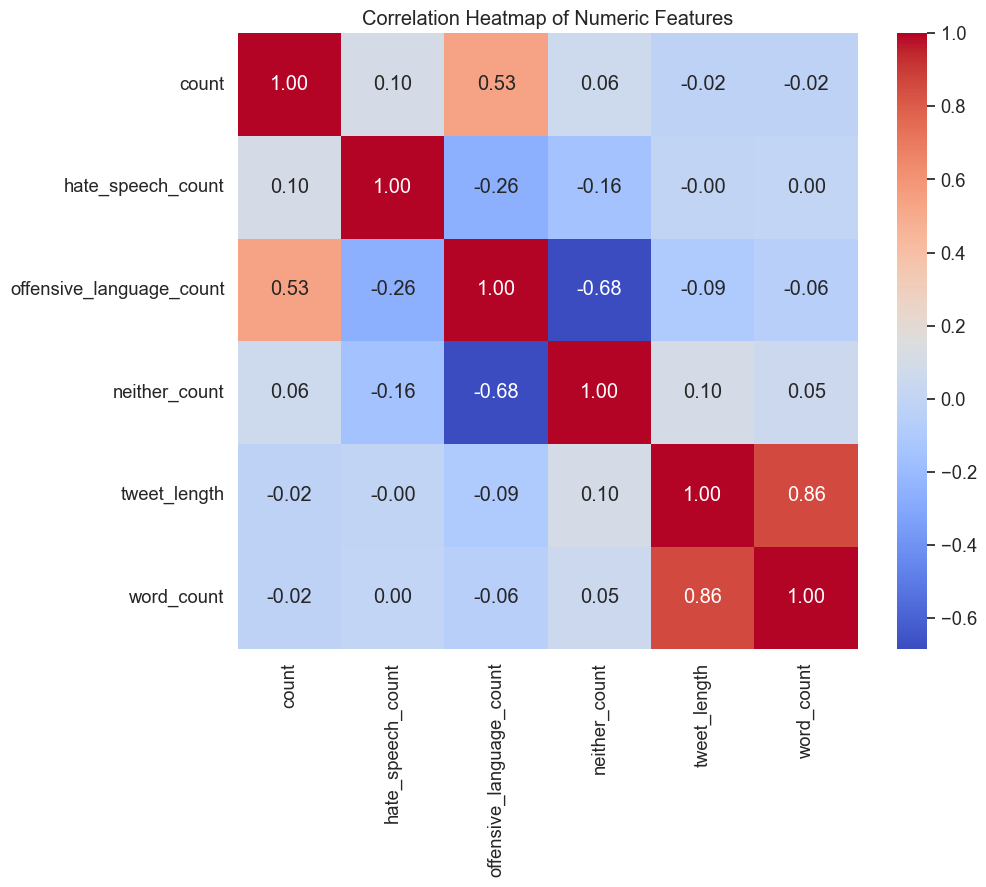

In [256]:
# Creating 2 new columns, tweet length and word count of tweets
data['tweet_length'] = data['tweet'].apply(lambda x: len(str(x)))
data['word_count'] = data['tweet'].apply(lambda x: len(str(x).split()))

# Define the numeric columns (including features from your dataset)
numeric_cols = ['count', 'hate_speech_count', 'offensive_language_count', 
                'neither_count', 'tweet_length', 'word_count']

# Compute the correlation matrix
corr_matrix = data[numeric_cols].corr()

# Create a heatmap with annotations and a coolwarm color palette
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

C:\Users\Jiaru\AppData\Local\Temp\ipykernel_9504\2110988599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='binary_class', y='tweet_length', data=data, palette='Set2')


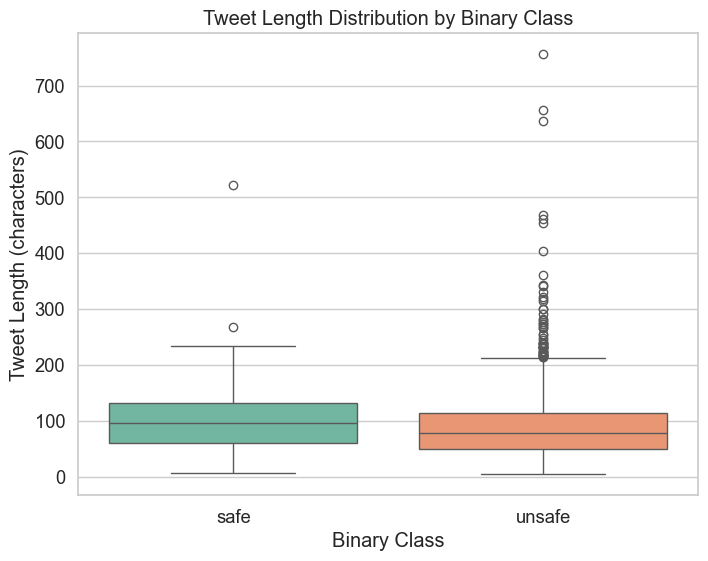

In [257]:
plt.figure(figsize=(8,6))
sns.boxplot(x='binary_class', y='tweet_length', data=data, palette='Set2')
plt.title("Tweet Length Distribution by Binary Class")
plt.xlabel("Binary Class")
plt.ylabel("Tweet Length (characters)")
plt.show()

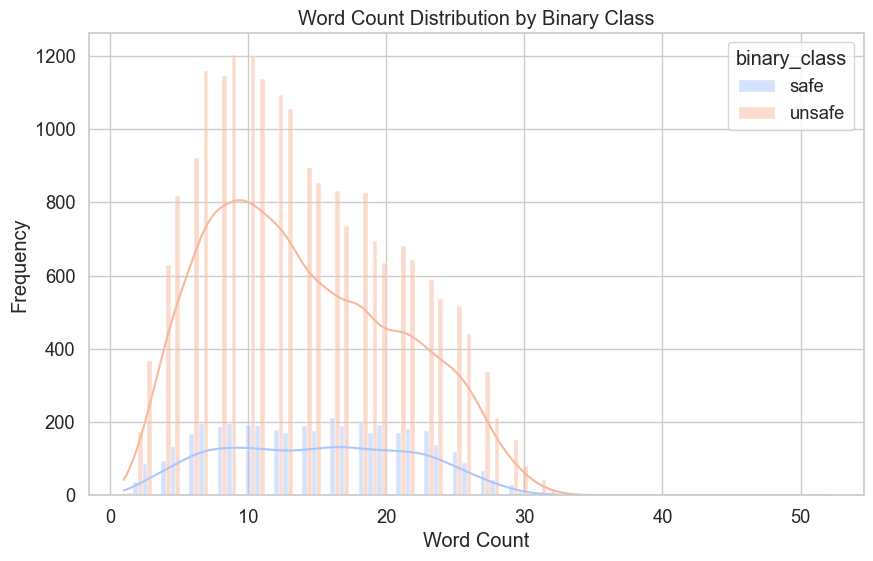

In [258]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='word_count', hue='binary_class', multiple='dodge', kde=True, palette='coolwarm')
plt.title("Word Count Distribution by Binary Class")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [259]:
# Download stopwords if not already present
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jiaru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [260]:
def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = text.strip()
    # Remove stopwords and apply stemming
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

# Create a cleaned copy of the data
data_cleaned = data.copy()
data_cleaned['tweet'] = data_cleaned['tweet'].apply(clean_text)

# Save the cleaned file for reference
data_cleaned.to_csv('data_cleaned.csv', index=False)
print("Cleaned data saved as 'data_cleaned.csv'.")
data_cleaned.head()

Cleaned data saved as 'data_cleaned.csv'.


,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,binary_class,tweet_length,word_count
0,3,0,0,3,2,rt mayasolov woman shouldnt complain clean hou...,safe,140,25
1,3,0,3,0,1,rt mleew boy dat coldtyga dwn bad cuffin dat h...,unsafe,85,16
2,3,0,3,0,1,rt urkindofbrand dawg rt sbabylif ever fuck bi...,unsafe,120,21
3,3,0,2,1,1,rt cganderson vivabas look like tranni,unsafe,62,9
4,6,0,6,0,1,rt shenikarobert shit hear might true might fa...,unsafe,137,26


By creating the tweet_length and word_count columns, its used to extract additional numeric features from the text data. 

Provide Additional Predictive Signals:
  The number of characters or words in a tweet might correlate with its content or style. For instance, hate speech or offensive tweets might have different lengths or word counts compared to safe tweets. 

Complement Text-Based Features:
  When combined with text features (like those generated from TF-IDF), these numeric metrics add another layer of information that could help the model better distinguish between classes.

In [261]:
# For the uncleaned data
data['tweet_length'] = data['tweet'].apply(lambda x: len(str(x)))
data['word_count'] = data['tweet'].apply(lambda x: len(str(x).split()))

# For the cleaned data
data_cleaned['tweet_length'] = data_cleaned['tweet'].apply(lambda x: len(str(x)))
data_cleaned['word_count'] = data_cleaned['tweet'].apply(lambda x: len(str(x).split()))



TF‑IDF stands for Term Frequency - Inverse Document Frequency. When applying a TF‑IDF vectorizer to the tweets, it creates a matrix where each row represents a document and each column represents a term from the corpus. The cell values are the TF‑IDF scores, indicating the importance of that term.

In [262]:
def get_features(df, text_col='tweet'):
    # Check if the provided text_col exists
    if text_col not in df.columns:
        raise KeyError(f"Column '{text_col}' not found in DataFrame. Available columns: {df.columns.tolist()}")
    
    # Initialize TF-IDF Vectorizer (limit to 5000 features)
    tfidf = TfidfVectorizer(max_features=5000)
    X_text = tfidf.fit_transform(df[text_col])
    
    # Define additional numeric features
    numeric_cols = ['tweet_length', 'word_count', 'count', 
                    'hate_speech_count', 'offensive_language_count', 'neither_count']
    
    # Ensure all numeric columns exist
    for col in numeric_cols:
        if col not in df.columns:
            raise KeyError(f"Column '{col}' not found in DataFrame. Please create it before feature extraction.")
    
    numeric_features = df[numeric_cols]
    numeric_features_sparse = csr_matrix(numeric_features.values)
    
    # Combine TF-IDF and numeric features
    X = hstack([X_text, numeric_features_sparse])
    
    # Target variable
    y = df['binary_class']
    return X, y


LogisticRegression

In [263]:
# Extract features from the uncleaned data
X_uncleaned, y_uncleaned = get_features(data, text_col='tweet')

# Split the data (80% training, 20% testing)
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(
    X_uncleaned, y_uncleaned, test_size=0.2, random_state=42, stratify=y_uncleaned
)

# Train a Logistic Regression model on uncleaned data
lr_uncleaned = LogisticRegression(max_iter=1000)
lr_uncleaned.fit(X_train_u, y_train_u)
y_pred_u = lr_uncleaned.predict(X_test_u)

print("=== Uncleaned Data Model (Default Parameters) ===")
print("Accuracy:", accuracy_score(y_test_u, y_pred_u))
print(classification_report(y_test_u, y_pred_u))

=== Uncleaned Data Model (Default Parameters) ===
Accuracy: 0.9997982650796853
              precision    recall  f1-score   support

        safe       1.00      1.00      1.00       833
      unsafe       1.00      1.00      1.00      4124

    accuracy                           1.00      4957
   macro avg       1.00      1.00      1.00      4957
weighted avg       1.00      1.00      1.00      4957



In [264]:
# Extract features from the cleaned data
X_clean, y_clean = get_features(data_cleaned, text_col='tweet')

# Split the cleaned data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

# Train a Logistic Regression model on cleaned data
lr_clean = LogisticRegression(max_iter=1000)
lr_clean.fit(X_train_c, y_train_c)
y_pred_c = lr_clean.predict(X_test_c)

print("=== Cleaned Data Model (Default Parameters) ===")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print(classification_report(y_test_c, y_pred_c))

=== Cleaned Data Model (Default Parameters) ===
Accuracy: 0.9997982650796853
              precision    recall  f1-score   support

        safe       1.00      1.00      1.00       833
      unsafe       1.00      1.00      1.00      4124

    accuracy                           1.00      4957
   macro avg       1.00      1.00      1.00      4957
weighted avg       1.00      1.00      1.00      4957



In [265]:
# Define hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Set up GridSearchCV using the cleaned training data
grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_lr.fit(X_train_c, y_train_c)

print("Best parameters (Cleaned Data with Tuning):", grid_lr.best_params_)

# Predict and evaluate on the cleaned test data with tuned hyperparameters
y_pred_c_tuned = grid_lr.predict(X_test_c)
print("=== Cleaned Data Model (With Hyperparameter Tuning) ===")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c_tuned))
print(classification_report(y_test_c, y_pred_c_tuned))

Best parameters (Cleaned Data with Tuning): {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
=== Cleaned Data Model (With Hyperparameter Tuning) ===
Accuracy: 0.9997982650796853
              precision    recall  f1-score   support

        safe       1.00      1.00      1.00       833
      unsafe       1.00      1.00      1.00      4124

    accuracy                           1.00      4957
   macro avg       1.00      1.00      1.00      4957
weighted avg       1.00      1.00      1.00      4957



Random Forest

In [266]:
# Initialize and train the Random Forest model (default parameters)
rf_uncleaned = RandomForestClassifier(random_state=42)
rf_uncleaned.fit(X_train_u, y_train_u)

# Predict and evaluate
y_pred_rf_u = rf_uncleaned.predict(X_test_u)
print("=== Uncleaned Data Model (Random Forest, Default Parameters) ===")
print("Accuracy:", accuracy_score(y_test_u, y_pred_rf_u))
print(classification_report(y_test_u, y_pred_rf_u))

=== Uncleaned Data Model (Random Forest, Default Parameters) ===
Accuracy: 0.9989913253984265
              precision    recall  f1-score   support

        safe       0.99      1.00      1.00       833
      unsafe       1.00      1.00      1.00      4124

    accuracy                           1.00      4957
   macro avg       1.00      1.00      1.00      4957
weighted avg       1.00      1.00      1.00      4957



In [267]:
# Initialize and train the Random Forest model on cleaned data (default parameters)
rf_clean = RandomForestClassifier(random_state=42)
rf_clean.fit(X_train_c, y_train_c)

# Predict and evaluate
y_pred_rf_clean = rf_clean.predict(X_test_c)
print("=== Cleaned Data Model (Random Forest, Default Parameters) ===")
print("Accuracy:", accuracy_score(y_test_c, y_pred_rf_clean))
print(classification_report(y_test_c, y_pred_rf_clean))

=== Cleaned Data Model (Random Forest, Default Parameters) ===
Accuracy: 0.9989913253984265
              precision    recall  f1-score   support

        safe       0.99      1.00      1.00       833
      unsafe       1.00      1.00      1.00      4124

    accuracy                           1.00      4957
   macro avg       1.00      1.00      1.00      4957
weighted avg       1.00      1.00      1.00      4957



In [268]:
# Define a hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Set up GridSearchCV for Random Forest using the cleaned training data
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_rf.fit(X_train_c, y_train_c)

# Display best parameters from grid search
print("Best parameters for Random Forest:", grid_rf.best_params_)

# Evaluate the tuned model on the cleaned test data
y_pred_rf_tuned = grid_rf.predict(X_test_c)
print("=== Cleaned Data Model (Random Forest with Hyperparameter Tuning) ===")
print("Accuracy:", accuracy_score(y_test_c, y_pred_rf_tuned))
print(classification_report(y_test_c, y_pred_rf_tuned))

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
=== Cleaned Data Model (Random Forest with Hyperparameter Tuning) ===
Accuracy: 0.9989913253984265
              precision    recall  f1-score   support

        safe       0.99      1.00      1.00       833
      unsafe       1.00      1.00      1.00      4124

    accuracy                           1.00      4957
   macro avg       1.00      1.00      1.00      4957
weighted avg       1.00      1.00      1.00      4957



Summary:
When comparing dataset of uncleaned vs cleaned vs cleaned with hyperparameters, accuracy change.
Possibly, cleaning has minimal to no impact, due to the fact dataset has very clear patterns when it comes to offensive tweets, as using TF-IDF representation makes such that offensive words are given a "high-score" in the matrix which translate extremely easy classification of a tweet being 'unsafe'. and this doesn't change whether the data is raw/cleaned/have hypermeters.

Below is just for looking deeper into model's predictions

In [ ]:
def get_features(df, text_col='tweet'):
    # Initialize TF-IDF Vectorizer
    tfidf = TfidfVectorizer(max_features=5000)
    X_text = tfidf.fit_transform(df[text_col])
    
    # Define additional numeric features
    numeric_cols = ['tweet_length', 'word_count', 'count', 
                    'hate_speech_count', 'offensive_language_count', 'neither_count']
    
    numeric_features = df[numeric_cols]
    numeric_features_sparse = csr_matrix(numeric_features.values)
    
    # Combine TF-IDF and numeric features
    X = hstack([X_text, numeric_features_sparse])
    
    # Target variable
    y = df['binary_class']
    return X, y, tfidf

# Extract features from the cleaned data
X, y, tfidf_model = get_features(data_cleaned, text_col='tweet')

# Split data into train and test set
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, data_cleaned.index, test_size=0.2, random_state=42, stratify=y
)

# Train both models
# Logistic Regression Model 
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Random Forest Model 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Select the random 5 indices from the test set for demonstration
random_positions = np.random.choice(len(idx_test), size=5, replace=False)

# Since train_test_split preserves order, the 5 rows of X_test match sample_indices.
sample_indices = idx_test[random_positions]

# Get the corresponding feature rows from X_test
X_sample = X_test[random_positions]

# Make predictions using both models
preds_lr = lr_model.predict(X_sample)
preds_rf = rf_model.predict(X_sample)

# Display results

print("Predictions for a few sample tweets:\n")
for i, idx in enumerate(sample_indices):
    tweet_text = data_cleaned.loc[idx, 'tweet']
    actual_label = data_cleaned.loc[idx, 'binary_class']
    lr_prediction = preds_lr[i]
    rf_prediction = preds_rf[i]
    print(f"Tweet: {tweet_text}")
    print(f"Actual: {actual_label}")
    print(f"Logistic Regression Prediction: {lr_prediction}")
    print(f"Random Forest Prediction: {rf_prediction}")
    print("-" * 80)


Predictions for a few sample tweets:

Tweet: rt hoe scarlett johansson
Actual: unsafe
Logistic Regression Prediction: unsafe
Random Forest Prediction: unsafe
--------------------------------------------------------------------------------
Tweet: grandeftlou bulli didnt know u could bulli internet bitch came idk u mention bruh
Actual: unsafe
Logistic Regression Prediction: unsafe
Random Forest Prediction: unsafe
--------------------------------------------------------------------------------
Tweet: alexissixela whitethunduh legit watch second wtf prob caus retard smh
Actual: unsafe
Logistic Regression Prediction: unsafe
Random Forest Prediction: unsafe
--------------------------------------------------------------------------------
Tweet: rt zachdorsey trash worth
Actual: safe
Logistic Regression Prediction: safe
Random Forest Prediction: safe
--------------------------------------------------------------------------------
Tweet: towherev im yellow im sorri
Actual: safe
Logistic Regress